In [253]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.special as spc
import seaborn as sns

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [311]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

# AMS 241, Problem Set 1

## Zachary Jennings

All problems were worked out in this ipython notebook. Much of the actual code is contained in a module that I coded, defined in DirichletProcess.py. If desired (to prove I didn't lift the package off the shelf or something...), the source code can be toggled on and off by clicking that button at the very top (and the actual notebook can even be downloaded at: https://github.com/zachjennings/ams241_hw_nonparametric_bayes/tree/problem1_edits/hw1)

### Problem 1:

We saw in class that, for a Dirichlet distribution,
$$E(Y_i~Y_j) = \frac{a_i~a_j}{\sum^k_{l=1}a_l (1 + \sum^k_{l=1}a_l)}~\textrm{and}~E(Y_i) = \frac{a_i}{\sum^k_{l=1}a_l }.$$
Since $Cov(X,Y) = E(X,Y)^2 - E(X)E(Y)$ and the denominator of $E(Y_i~Y_j)$ must be greater than $(\sum^k_{l=1}a_l)^2$, we know the covariance of any two disjoint subsets must be negative. Since a realization of the DP is just a generation from a Dirichlet with a function specified instead of a value, we know this must be true for DPs too. 

I don't believe that this negative correlation is a restriction. It seems to be a consequence of the fact that we require the Dirichlet to be a probability distribution. If the probability associated with one particular subset is increased, we would expect the probability in other sections to be decreased to allow for this increase. Thus any restriction caused by this negative covariance is simply a result of our requiring our distribution to be a real probability distribution.


### Problem 2:

We are considering a DP prior $DP(\alpha,G_0)$ with $G_0 = N(0,1)$. First, we realize this prior with the Ferguson construction. Here we sample the CDF of our $G_0$ distribution over a fine grid, then use these values to populate a Dirichlet distribution that we may sample. I plot 20 realizations of CDFs for four different values of $\alpha$ below. 

In [456]:
def plot_ferguson(alpha,ax,grid=np.linspace(-4,4,200),**kwargs):
    g_0 = stats.norm()
    dp = DP()
    post = dp.draw_cdf_ferg(g_0=g_0,alpha=np.array([alpha]),n_cdf=20,grid=grid)
    dp.plot_cdfs(post,alpha=0.5,ax=ax,grid=grid)
    
def plot_stick(alpha,ax,grid=np.linspace(-4,4,200),**kwargs):
    g_0 = stats.norm()
    dp = DP()
    post = dp.draw_cdf_stick(g_0=g_0,alpha=np.array([alpha]),n_cdf=20)
    dp.plot_cdfs(post,alpha=0.5,ax=ax,grid=grid)

def mean_hists(alpha,ax,grid=np.linspace(-4,4,200),**kwargs):
    post = dp.draw_cdf_ferg(g_0=g_0,alpha=np.array([alpha]),n_cdf=200,grid=grid)
    means = []
    for i in post:
        means.append(i.get_mean())
    ax.hist(means)
    
def sig_hists(alpha,ax,grid=np.linspace(-4,4,200),**kwargs):
    post = dp.draw_cdf_ferg(g_0=g_0,alpha=np.array([alpha]),n_cdf=200,grid=grid)
    sigs = []
    for i in post:
        sigs.append(i.get_sd())
    ax.hist(sigs)
    
def gamma_plots(a,b,ax,grid=np.linspace(-4,4,200),**kwargs):
    g_0 = stats.norm()
    dp = DP()
    post = dp.mdp_gamma(a=a,b=b,n_cdf=20,grid=grid)
    dp.plot_cdfs(post,alpha=0.5,ax=ax,grid=grid)

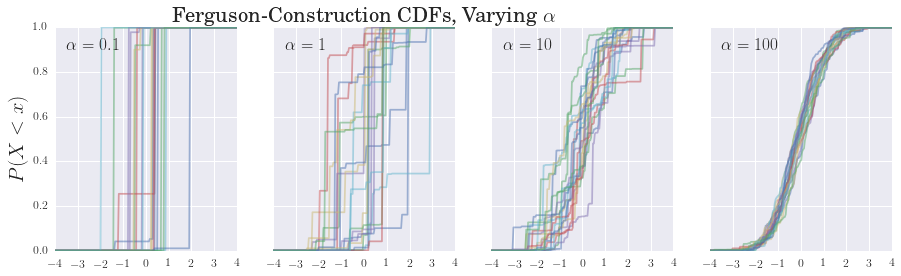

In [432]:
fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)
plot_ferguson(0.1,ax[0])
plot_ferguson(1.,ax[1])
plot_ferguson(10.,ax[2])
plot_ferguson(100.,ax[3])

ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Ferguson-Construction CDFs, Varying $\alpha$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\alpha = 0.1$',size='x-large')
ax[1].text(-3.5,0.9,r'$\alpha = 1$',size='x-large')
ax[2].text(-3.5,0.9,r'$\alpha = 10$',size='x-large')
foo = ax[3].text(-3.5,0.9,r'$\alpha = 100$',size='x-large')

Next, I repeat the process, but now I construct CDFs using the stick-breaking construction. Now one itereates on the stick-breaking procedure until a desired error-tolerance is reached. 

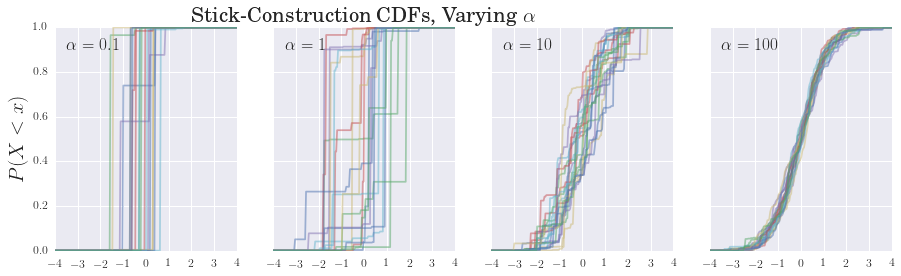

In [473]:
fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)
plot_stick(0.1,ax[0])
plot_stick(1.,ax[1])
plot_ferguson(10.,ax[2])
plot_ferguson(100.,ax[3])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Stick-Construction CDFs, Varying $\alpha$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\alpha = 0.1$',size='x-large')
ax[1].text(-3.5,0.9,r'$\alpha = 1$',size='x-large')
ax[2].text(-3.5,0.9,r'$\alpha = 10$',size='x-large')
foo = ax[3].text(-3.5,0.9,r'$\alpha = 100$',size='x-large')

In the next two rows, I plot the distributions of the mean and variance for the prior distributions for different values of $\alpha$, created with the Ferguson construction. As we increase $\alpha$, we see that the mean clusters more and more around the true value for the prior. The scatter decreases as we make alpha higher due to the fact that we break more subsets of the stick. 

The variance actually tends to increase as we increase $\alpha$. This is due to the fact that, when we make few samples of the CDF, most of the mass lands in just a few points, thereby greatly decreasing the variance. As $\alpha$ increases, the variance becomes more well-behaved, clustering in a reasonable way about the true value. 

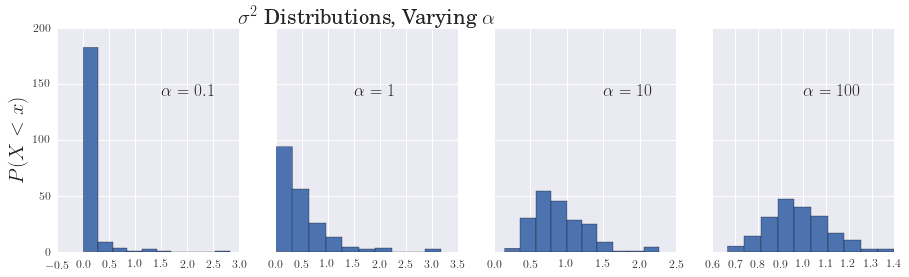

In [443]:
fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)
sig_hists(0.1,ax[0])
sig_hists(1,ax[1])
sig_hists(10,ax[2])
sig_hists(100,ax[3])

ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'$\sigma^2$ Distributions, Varying $\alpha$',size='xx-large')
ax[0].text(1.5,140,r'$\alpha = 0.1$',size='x-large')
ax[1].text(1.5,140,r'$\alpha = 1$',size='x-large')
ax[2].text(1.5,140,r'$\alpha = 10$',size='x-large')
foo = ax[3].text(1.0,140,r'$\alpha = 100$',size='x-large')

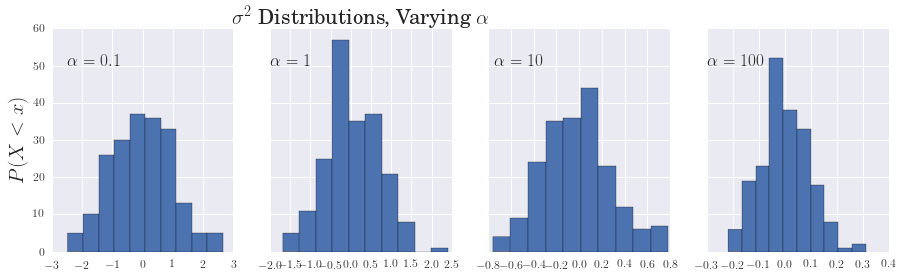

In [441]:
fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)
mean_hists(0.1,ax[0])
mean_hists(1,ax[1])
mean_hists(10,ax[2])
mean_hists(100,ax[3])

ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Mean Distributions, Varying $\alpha$',size='xx-large')
ax[0].text(-2.5,50,r'$\alpha = 0.1$',size='x-large')
ax[1].text(-2,50,r'$\alpha = 1$',size='x-large')
ax[2].text(-0.75,50,r'$\alpha = 10$',size='x-large')
foo = ax[3].text(-0.3,50,r'$\alpha = 100$',size='x-large')

Finally, we consider the case where, rather than fixing $\alpha$, we draw it from a gamma distribution with hyperparameters $a$ and $b$. I plot 20 CDF realizations for different sets of values of $a$ and $b$. As the left-most panel has the lowest expectation for $\alpha$, we would expect it to have the fewest breaks. The right two panels both have equivlent expectation, but $b=5$ should have more variance.

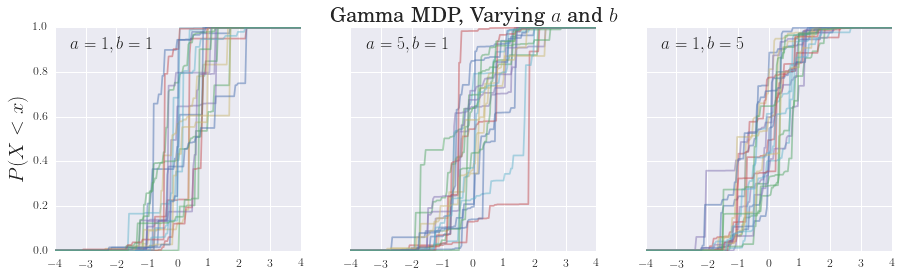

In [462]:
fig,ax = plt.subplots(1,3,figsize=(15,4),sharey=True)
gamma_plots(1.,1.,ax[0])
gamma_plots(5.,1.,ax[1])
gamma_plots(1.,5.,ax[2])

ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Gamma MDP, Varying $a$ and $b$',size='xx-large')
ax[0].text(-3.5,0.9,r'$a = 1, b = 1$',size='x-large')
ax[1].text(-3.5,0.9,r'$a = 5, b = 1$',size='x-large')
foo = ax[2].text(-3.5,0.9,r'$a = 1, b = 5$',size='x-large')

### Problem 3: 

Here we consider posterior inference for data generated from two distributions. As we saw in class, for fixed $G_0$ and $\alpha$, the posterior distribution of $G$ is 
$$G\sim DP(\alpha,G_0),$$
$$G_0 = \frac{\alpha}{\alpha + n} + \frac{1}{\alpha+n}\sum^{n}_{i=1}1_{[y,\infty)}(t).$$
Thus we may easily simulate posterior draws by making CDFs using either of our above constructions. Since I found the Fergueson construction to be faster given the way I had coded it, I chose to use it to perform my inferences.

#### First Distribution: $Y\sim N(0,1)$
First, we consider data drawn from a standard normal distribution. We consider $n=20, 200,$ and $2000$ datapoints. I plot posterior CDF inference for 10 CDF realizations with parameters $(alpha=1.,\sigma^2=1.,\mu=0.)$. In each plot, I plot the actual data as a solid blue line, with 

In [222]:
def plot_data(dat,alpha,mu,sigma,ax,grid=np.linspace(-4,4,200),**kwargs):
    emp_cdf = CDF(np.sort(dat),cdf=np.linspace(0,1,dat.size+1))
    g_0 = stats.norm(loc=mu,scale=sigma)
    dp = DP()
    post = dp.post_inf(emp_cdf,g_0,alpha=np.array([alpha]),n_cdf=10,grid=grid)
    emp_cdf = [emp_cdf]
    dp.plot_cdfs(emp_cdf,linewidth=4,ax=ax,c='b',grid=grid,**kwargs)
    dp.plot_cdfs(post,alpha=0.5,ax=ax,grid=grid)

In [231]:
n20_data = gen_single(20)
n200_data = gen_single(200)
n2000_data = gen_single(2000)

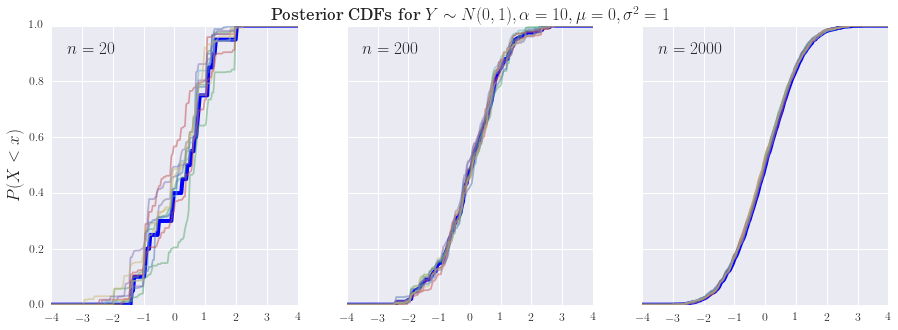

In [232]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
plot_data(n20_data,10.,0.,1.,ax[0])
plot_data(n200_data,10.,0.,1.,ax[1])
plot_data(n2000_data,10.,0.,1.,ax[2])
ax[0].set_ylabel(r'$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Posterior CDFs for $Y\sim N(0,1), \alpha=10,\mu=0,\sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$n = 20$',size='xx-large')
ax[1].text(-3.5,0.9,r'$n = 200$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$n = 2000$',size='xx-large')

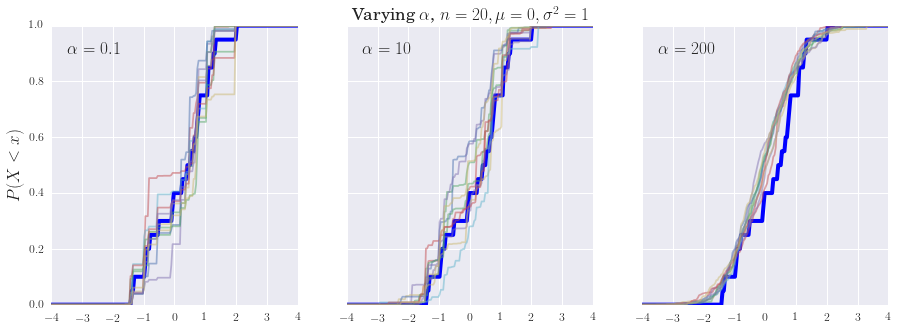

In [233]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)

plot_data(n20_data,0.1,0.,1.,ax[0])
plot_data(n20_data,10.,0.,1.,ax[1])
plot_data(n20_data,200.,0.,1.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\alpha$, $n=20,\mu=0,\sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\alpha = 0.1$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\alpha = 10$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\alpha = 200$',size='xx-large')

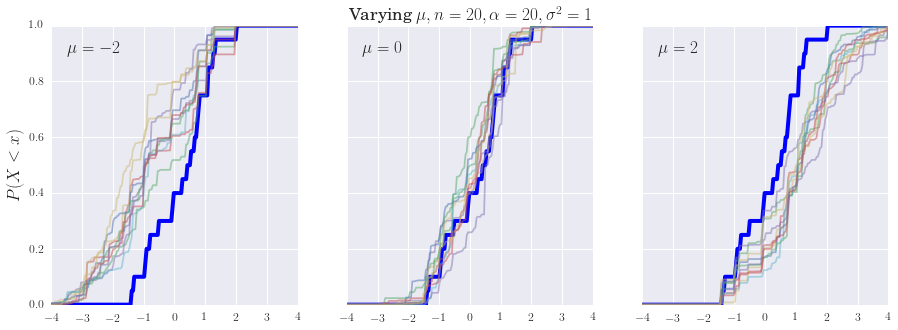

In [234]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)

plot_data(n20_data,20.,-2.,1.,ax[0])
plot_data(n20_data,20.,0.,1.,ax[1])
plot_data(n20_data,20.,2.,1.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\mu, n=20, \alpha=20, \sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\mu = -2$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\mu = 0$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\mu = 2$',size='xx-large')

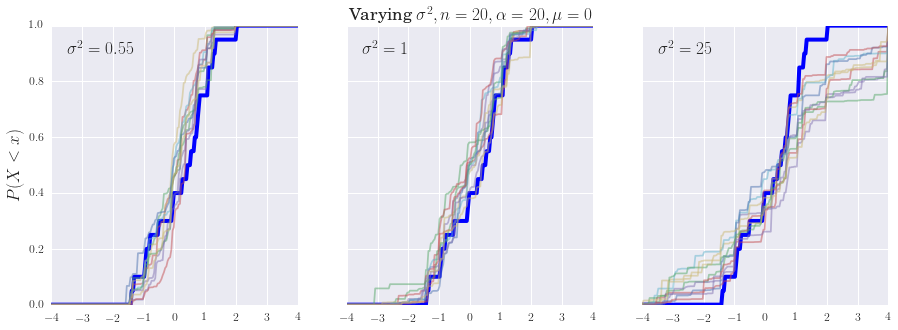

In [235]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
plot_data(n20_data,20.,0.,np.sqrt(0.3),ax[0])
plot_data(n20_data,20.,0.,1.,ax[1])
plot_data(n20_data,20.,0.,5.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\sigma^2, n=20, \alpha=20, \mu=0$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\sigma^2 = 0.55$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\sigma^2 = 1$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\sigma^2 = 25$',size='xx-large')

In general, the behavior is as we expect. For inferences where the number of data points n is much larger than $\alpha$, the values assumed for the normal prior become less and less important. For investigating the effects of $\mu$ and $\sigma^2$, I used a low value of $n$ and a comparable value of $\alpha$ to emphasize the effects more. Moving the value of $\mu$ causes the inferred CDFs to shift to the left or right, while changing the value for sigma affects the spread of the CDFs about the location of the mean. 

#### Second Distribution: $Y\sim 0.5N(-2.5,0.5^2) + 0.3N(0.5,0.7^2) + 0.2N(1.5,2^2)$
Next, we consider data drawn from a mixture of normals with a heavy tail, with parameters otherwised fixed as before. Again, posterior CDFs for 10 realizations are plotted.

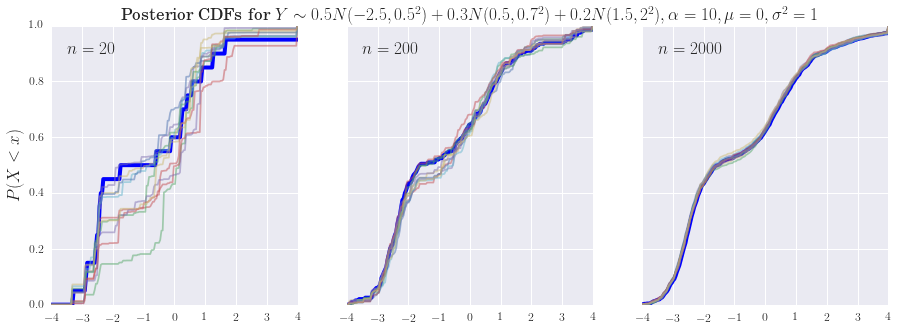

In [237]:
mix20_data = gen_mixture(20)
mix200_data = gen_mixture(200)
mix2000_data = gen_mixture(2000)
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
plot_data(mix20_data,10.,0.,1.,ax[0])
plot_data(mix200_data,10.,0.,1.,ax[1])
plot_data(mix2000_data,10.,0.,1.,ax[2])
ax[0].set_ylabel(r'$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Posterior CDFs for $Y\sim 0.5N(-2.5,0.5^2) + 0.3N(0.5,0.7^2) + 0.2N(1.5,2^2),\alpha=10,\mu=0,\sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$n = 20$',size='xx-large')
ax[1].text(-3.5,0.9,r'$n = 200$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$n = 2000$',size='xx-large')

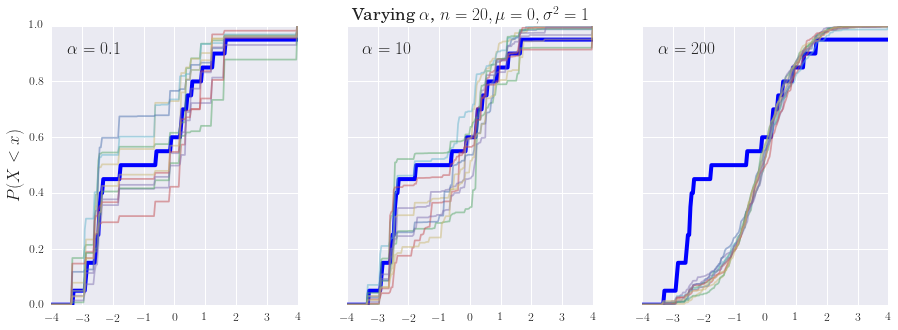

In [238]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)

plot_data(mix20_data,0.1,0.,1.,ax[0])
plot_data(mix20_data,10.,0.,1.,ax[1])
plot_data(mix20_data,200.,0.,1.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\alpha$, $n=20,\mu=0,\sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\alpha = 0.1$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\alpha = 10$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\alpha = 200$',size='xx-large')

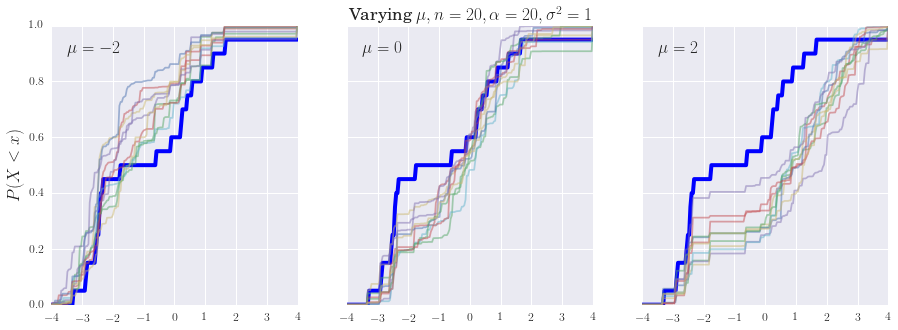

In [239]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)

plot_data(mix20_data,20.,-2.,1.,ax[0])
plot_data(mix20_data,20.,0.,1.,ax[1])
plot_data(mix20_data,20.,2.,1.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\mu, n=20, \alpha=20, \sigma^2=1$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\mu = -2$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\mu = 0$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\mu = 2$',size='xx-large')

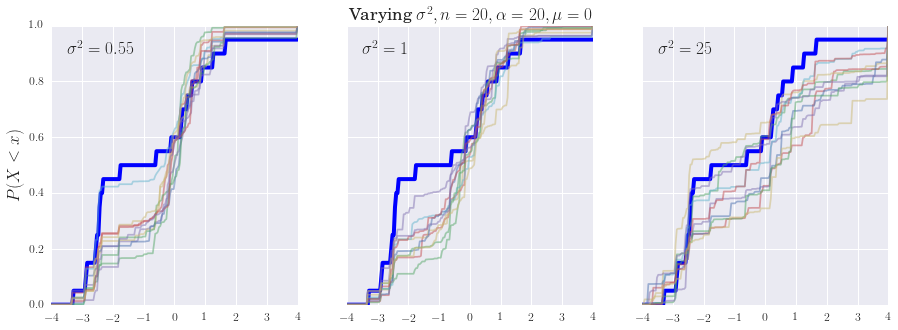

In [261]:
fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
plot_data(mix20_data,20.,0.,np.sqrt(0.3),ax[0])
plot_data(mix20_data,20.,0.,1.,ax[1])
plot_data(mix20_data,20.,0.,5.,ax[2])
ax[0].set_ylabel('$P(X < x)$',size='xx-large')
foo = ax[1].set_title(r'Varying $\sigma^2, n=20, \alpha=20, \mu=0$',size='xx-large')
ax[0].text(-3.5,0.9,r'$\sigma^2 = 0.55$',size='xx-large')
ax[1].text(-3.5,0.9,r'$\sigma^2 = 1$',size='xx-large')
foo = ax[2].text(-3.5,0.9,r'$\sigma^2 = 25$',size='xx-large')

As before, large numbers of observed data and comparitively small values for $\alpha$ allow the inferred CDFs to follow the emperical distribution better. However, for larger values of $\alpha$, we clearly see where our assumption of $G_0\sim N(0,1)$ breaks down. The problem can be excerbated by moving the CDFs around by changing $\mu$. Interestingly, large values for $\sigma^2$ can in some ways mimic the heavier tails of this mixture distribution, albeit shifted downward slightly.

### Problem 4

We now consider the model
$$y_i~|~F \sim^{i.i.d.} F,$$
$$F~|~\alpha, \lambda \sim DP(\alpha,F_0),$$
$$F_0=Poisson(\lambda), \alpha\sim Gamma(c,d), \lambda\sim Gamma(a,b).$$
To sample from this distribution, we adopt the result from class to marginalize out $F$, giving us a "likelihood"
$$L(\alpha,\lambda;data) \propto \frac{\alpha^{n^*}}{\alpha^{(n)}} \prod^{n^*}_{j=1}~f_0(y_j^*|\lambda)~(f_0(y_j^*|\lambda) + 1)^{(n^*)}.$$
At this point, we use $P(\alpha,\lambda | data)\propto P(\alpha)~P(\lambda)~L(\alpha,\lambda;data)$ and employ MCMC to sample from our posterior distribution. I employed a simple Metropolis-Hastings algorithm, using a MVN with no covariance as a proposal distribution. I sampled on $\log(\alpha)$ and $\log(\lambda)$. After experimentation, I found that adopting $\sigma$ = 0.3 for $\log(\alpha)$ and $\sigma$=0.01 for $\log(\lambda)$ gave good mixing and acceptance fractions for the MCMC. For these runs, I set $a=b=10$ and $b=c=2$.

Trace and covariance plots for the MCMC sampler are shown below. For both the covariance plot and the CDF realizations, I discarded the first 1000 iterations. 

In [474]:
data = gen_poisson(300)
emp_cdf = CDF(np.sort(data),cdf=np.linspace(0,1,data.size+1))
mdp = MDPDiscrete(emp_cdf,sig_alpha=0.3,sig_lambda=0.01)
mdp.mcmc_step(n_steps=5000)

Acceptance fraction for this run:0.286


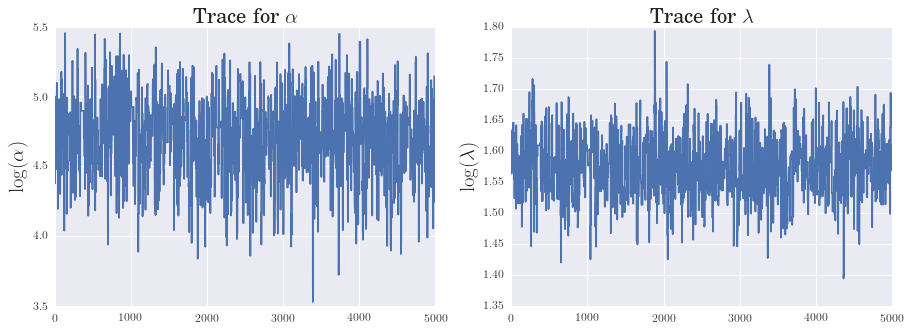

In [475]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(mdp.log_alphas)
ax[0].set_title(r'Trace for $\alpha$',size='xx-large')
ax[0].set_ylabel(r'$\log(\alpha)$',size='xx-large')
ax[1].plot(mdp.log_lambdas)
ax[1].set_title(r'Trace for $\lambda$',size='xx-large')
ax[1].set_ylabel(r'$\log(\lambda)$',size='xx-large')

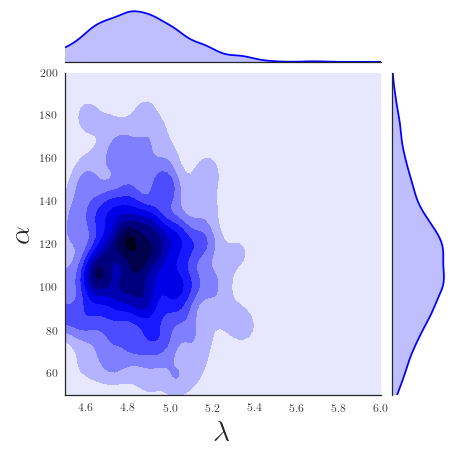

In [476]:
with sns.axes_style("white"):
    kde = (sns.jointplot(x=np.exp(mdp.log_lambdas[1000:]), y=np.exp(mdp.log_alphas[1000:]), kind="kde", color="b",\
                 stat_func=None,xlim=(4.5,6.0),ylim=(50,200)).set_axis_labels(r'$\lambda$',r'$\alpha$',fontsize=30))

Following posterior simulation for $\alpha$ and $\lambda$, we can draw CDF realizations by sampling the CDF for each draw from $\alpha$ and $\lambda$. We saw in class that
$$F~|~\alpha,~\lambda \sim DP(\alpha,F_0),$$
$$F_0 = \frac{\alpha}{\alpha + n}~f_0(~t~|~\lambda) + \frac{1}{\alpha+n}\sum^{n}_{i=1}1_{[y,\infty)}(t).$$
Setting $f_0$ to a Poisson distribution, we can simulate using our standard techniques. Again, I simulated CDFs using the Ferguson construction. Below I plot around 15 CDF realizations for randomly selected $\alpha$ and $\lambda$ from my MCMC sample. The generated data are shown in a thick blue like. I actually consistently scatter a bit above the true line of the data, perhaps due to a slight prior preference in this direction from the prior.

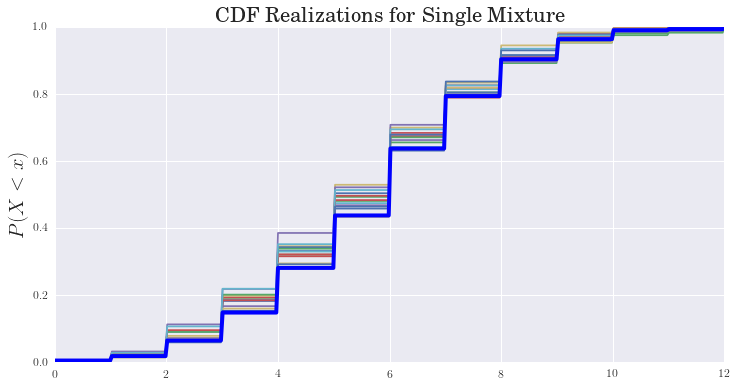

In [477]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
dp = DP()
emp_cdf_discrete = CDF(np.sort(data),cdf=np.linspace(0,1,data.size+1))
cdf_arr = dp.post_inf(emp_cdf_discrete,stats.poisson(1.),alpha=np.exp(mdp.log_alphas)[1000:],\
                      lamb=np.exp(mdp.log_lambdas)[1000:],sample_factor=300)
dp.plot_cdfs(cdf_arr,ax=ax,grid=np.linspace(0,np.max(emp_cdf.x),400))
dp.plot_cdfs([emp_cdf],ax=ax,grid=np.linspace(0,np.max(emp_cdf.x),400),linewidth=4,color='b')
ax.set_title('CDF Realizations for Single Mixture',size='xx-large')
foo = ax.set_ylabel('$P(X < x)$',size='xx-large')

#### Mixed Data 

Now we consider a model where the data are generated from a model with two Poisson distributions,
$Y~\sim~0.7~\textrm{Poisson}(3) + 0.3~\textrm{Poisson}(11)$. I found an identical MCMC set up still worked well. The covariance plot and roughly 15 CDF realizations are shown below, again with the data plotted in a thick blue line.

In [387]:
data_mix = gen_poisson_mix(300)
emp_cdf_mix = CDF(np.sort(data_mix),cdf=np.linspace(0,1,data_mix.size+1))
mdp_mix = MDPDiscrete(emp_cdf_mix,sig_alpha=0.3,sig_lambda=0.01)
mdp_mix.mcmc_step(n_steps=5000)

Acceptance fraction for this run:0.2822


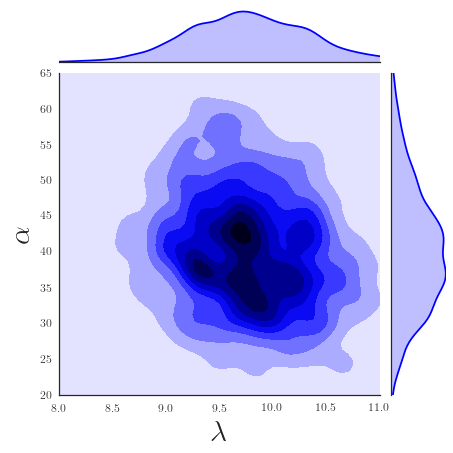

In [388]:
with sns.axes_style("white"):
    kde = (sns.jointplot(x=np.exp(mdp_mix.log_lambdas[1000:]), y=np.exp(mdp_mix.log_alphas[1000:]), kind="kde", color="b",\
                 stat_func=None,xlim=(8.0,11.0),ylim=(20,65)).set_axis_labels(r'$\lambda$',r'$\alpha$',fontsize=30))

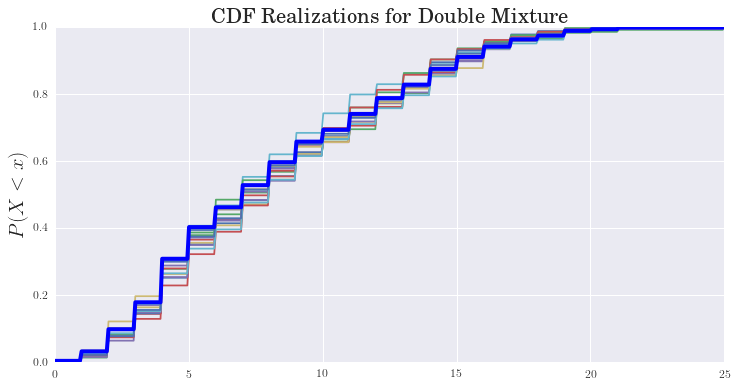

In [389]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
dp = DP()
emp_cdf_discrete_mix = CDF(np.sort(data_mix),cdf=np.linspace(0,1,data_mix.size+1))
cdf_arr_mix = dp.post_inf(emp_cdf_mix,stats.poisson(1.),alpha=np.exp(mdp_mix.log_alphas)[1000:],\
                      lamb=np.exp(mdp_mix.log_lambdas)[1000:],sample_factor=300)

dp.plot_cdfs(cdf_arr_mix,ax=ax,grid=np.linspace(0,np.max(emp_cdf_discrete_mix.x),400))
dp.plot_cdfs([emp_cdf_mix],ax=ax,grid=np.linspace(0,np.max(emp_cdf_mix.x),400),linewidth=4,color='b')
ax.set_title('CDF Realizations for Double Mixture',size='xx-large')
foo = ax.set_ylabel('$P(X < x)$',size='xx-large')

Even though we are using a prior (single Poisson) that doesn't match the data, we still obtain a reasonable fit, at least for some areas of the distribution. This is reflected in the lower inferred value for $\alpha$ compared to the previous fit. Now that the prior is incorrect, we find that giving more weight to the data is favored. In addition, we also infer a somewhat intermediate value of $\sim$9.75 for $\lambda$, indicating that the Poisson distribution is attempting to fit the heavier tail given by the second mixture. 

In general, I found that, as long as I wasn't selecting crazy values for the gamma priors, they didn't have much affect on inference. I did find that, when I selected values for the gamma prior that featured very little variance, I could pull $\alpha$ to specific directions, thereby forcing the model to put more weight in the prior. However, so long as the gamma priors were left reasonably unrestrictive, the model seemed to fit the data reasonably well. 

In [2]:
#Data generation for problem 3 and 4
def gen_single(n):
    return stats.norm.rvs(size=n)

def gen_mixture(n):
    #generate the proportions of mixtures
    gen_select = stats.uniform.rvs(size=n)
    mix_1 = np.sum(gen_select < 0.5)
    mix_2 = np.sum((gen_select < 0.8) & (gen_select > 0.5))
    mix_3 = np.sum(gen_select > 0.8)
    
    #generate the actual distributions
    data = np.array([])
    data = np.append(data,stats.norm.rvs(loc=-2.5,scale=0.5,size=mix_1))
    data= np.append(data,stats.norm.rvs(loc=0.5,scale=0.7,size=mix_2))
    data = np.append(data,stats.norm.rvs(loc=1.5,scale=2,size=mix_3))
    return data

def gen_poisson(n,mean=5.):
    #generate data from a single poisson
    return stats.poisson.rvs(mean,size=n)

def gen_poisson_mix(n):
    gen_select = stats.uniform.rvs(size=n)
    mix_1 = np.sum(gen_select < 0.7)
    mix_2 = np.sum(gen_select > 0.3)
    data = np.array([])
    data = np.append(data,stats.poisson.rvs(3.,size=mix_1))
    data = np.append(data,stats.poisson.rvs(11.,size=mix_2))
    return data


In [3]:
class MixFunction(object):
    '''
    Class to hold two emperical CDFs.
    
    Parameters:
        emp: emperical CDF
        g_0: "prior" distribution, scipy.stats.continuous_rv
        
    Methods:
        RV: draw n random variables
        CDF: return the CDF at a given X of the mixture distribution
    '''
    def __init__(self,emp,g_0,alpha):
        self.emp = emp
        self.g_0 = g_0
        self.alpha = alpha
        
    def rvs(self,size=1):
        emp_weight = self.emp.x.size / (self.alpha+self.emp.x.size)
        mixture = stats.uniform.rvs(size=size)
        if np.sum(mixture < emp_weight) > 0:
            emp_draws = self.emp.rvs(size=np.sum(mixture < emp_weight))
        else:
            emp_draws = []
        if np.sum(mixture > emp_weight) > 0:
            prior_draws = self.g_0.rvs(size=np.sum(mixture > emp_weight))
        else:
            prior_draws = []
        return np.concatenate([emp_draws,prior_draws])

    def cdf(self,check_x):
        cdf_emp = np.array(map(self.emp.get_prob,check_x))
        cdf_prior = self.g_0.cdf(check_x)

        emp_weight = self.emp.x.size / (self.alpha+self.emp.x.size)
        prior_weight = 1.-emp_weight
        
        return cdf_emp * emp_weight + cdf_prior * prior_weight

    

In [420]:
class CDF(object):
    '''
    Class to hold a single 1D discrete, DP-generated CDF
    '''
    def __init__(self,x,pdf=None,cdf=None,discrete=False):
        '''
        Parameters:
        x: n x 1 array where 
        p: (n+1) x 1 array which holds P(X < x)
        
        all arrays assumed to be sorted
        '''
        if pdf is None and cdf is None:
            print 'need to supply either a pdf or cdf'
            
        if pdf is None:
            self.cdf = np.array(cdf)
            self.pdf = self.cdf[1:] - self.cdf[:-1]

        if cdf is None:
            self.pdf = np.array(pdf)
            self.cdf = np.append(np.cumsum(pdf),1.)
            
        self.x = np.array(x)
        
        if discrete:
            uniq = np.unique(self.x,return_index=True)[1]
            self.cdf = self.cdf[uniq]
            self.cdf = np.append(self.cdf,1.)
            self.pdf = self.pdf[uniq]
            self.x = self.x[uniq]
        
    def get_prob(self,check_x):
        '''
        Return P(x < check_x)
        '''
        #if check_x is below the region where the CDF is defined, make sure to return 0.     
        if np.all(check_x < self.x):
            return 0.0
                
        if np.all(check_x > self.x):
            return 1.0
        
        diff = check_x - self.x
        mask = diff < 0.
        
        masked_diff = np.ma.masked_array(diff, mask)
        return self.cdf[masked_diff.argmin()+1]
    
    def rvs(self,size=1):
        '''
        Parameters:
            size: int, number of rvs desired
            
        Returns:
            RVs drawn from cumulative distribution
        '''
        probs = np.array(stats.uniform.rvs(size=size))
        rvs = []
        for i in probs:
            rvs.append(self.x[np.argmin(np.abs(self.cdf[:-1] - i))])
            
        return rvs
    
    def get_mean(self):
        '''
        Return the mean (weighted average) of the distributuion
        '''
        return np.sum(self.pdf * self.x)
    
    def get_sd(self):
        '''|
        Return the weighted variance of the distribution
        '''
        return np.sum(self.pdf * self.x**2) - self.get_mean()**2
        
        #return np.sum(self.pdf * (self.x - self.GetMean())**2)/((self.pdf.size - 1.)/(self.pdf.size)*np.sum(self.pdf))

In [357]:
class MDPDiscrete(object):
    '''
    A class to do posterior inference for
    a mixture of Dirichlet priors on discrete data.
    
    Currently only works for poisson priors. 
    '''
    def __init__(self,data,f_type='poisson',sig_alpha=1.,sig_lambda=1.,theta_init=np.array([5.,np.log(5.)])):
        '''
        Parameters:
            data: CDF object containing the emperical distribution
            f_0: scipy.stats object containing prior guess at model, 
                currently only works for Poisson function
            
            sig_alpha: sigma for alpha in MH proposal distribution
            sig_lambda: sigmpa for lambda in MH proposal distribution
        '''
        self.data = data
        self.y = np.unique(self.data.x)
        self.n_j = np.histogram(self.data.x,bins=(np.max(self.data.x) - np.min(self.data.x)+1))[0]
        self.n_j = self.n_j[np.nonzero(self.n_j)]
        self.n_star = self.y.size
        self.n = self.data.x.size
        self.f_type = f_type
        self.DP = DP()
        self.cov = np.array([[sig_alpha,0.],[0.,sig_lambda]])
        self.pos = theta_init
        self.log_alphas = theta_init[0]
        self.log_lambdas = theta_init[1]
        self.cur_like = self.log_like(self.pos[0],self.pos[1]) + self.log_prior(self.pos[0],self.pos[1]) 
        self.total_num_accepted = 0.
        self.total_steps = 0.
    
    def log_like(self,log_alpha,log_lambda):
        '''
        Method to return the log likelihood for parameter vector theta 
        Parameters:
            log_alpha, log_lambda: logs of parameters for likelihood function
        '''
        #set the prior function specification
        alpha = np.exp(log_alpha)
        lamb = np.exp(log_lambda)
        if self.f_type == 'poisson':
            f_0 = stats.poisson(lamb)
        
        log_f_0_like = []
        alpha_log_f_0_like = []
        
        for i in range(self.n_j.size):
            log_f_0_like.append(f_0.logpmf(self.y[i]))
            alpha_log_f_0_like.append(self.log_gamma_div(alpha*np.exp(log_f_0_like[i]) + 1.,self.n_j[i] - 1))
            
        #cond_post = self.DP.post_inf(self,emp,f_0,alpha=np.exp(log_alpha),n_cdf=1,**kwargs)
        tot_log_f_0_like = np.sum(np.array(log_f_0_like) + np.array(alpha_log_f_0_like))
        
        log_like = self.n_star*log_alpha - self.log_gamma_div(alpha,self.n) +\
            tot_log_f_0_like - log_alpha - log_lambda
        
        return log_like
                
    
    def log_prior(self,log_alpha,log_lambda,a=10.,b=10.,c=2.5,d=2.5):
        '''
        Method to return log of the prior.
        '''
        pri_alpha = stats.gamma.logpdf(np.exp(log_alpha),a,scale=b)
        pri_gamma = stats.gamma.logpdf(np.exp(log_lambda),c,scale=d)
        
        return pri_alpha + pri_gamma
    
    def mcmc_step(self,n_steps=1):
        '''
        Run the mcmc sampler for a given number of steps.
        '''
        num_accepted = 0.
        for i in range(n_steps):
            #draw two values from a MVN proposal distribution
            prop = stats.multivariate_normal.rvs(mean=self.pos,cov=self.cov)
            prop_like = self.log_like(prop[0],prop[1]) + self.log_prior(prop[0],prop[1])
            accept = prop_like - self.cur_like
            test = np.log(stats.uniform.rvs())

            #if the proposal is more likely, accept 
            if accept > 0 or accept >= test:
                self.log_alphas = np.append(self.log_alphas,prop[0])
                self.log_lambdas = np.append(self.log_lambdas,prop[1])
                self.cur_like = prop_like
                self.pos = np.array([prop[0],prop[1]])
                num_accepted += 1

            #if proposal is less likely, accept with probability accept
            elif accept < test:
                    self.log_alphas = np.append(self.log_alphas,self.pos[0])
                    self.log_lambdas = np.append(self.log_lambdas,self.pos[1])
            
        self.total_num_accepted += num_accepted
        self.total_steps += n_steps
        self.total_accept_frac = self.total_num_accepted / self.total_steps
        
        print 'Acceptance fraction for this run:'+str(num_accepted/n_steps)
    
    def gamma_div(self,z,m):
        '''
        for given arguments z, n_j, return:
            z * (z+1) * ... * (z+ n + 1)
        '''
        #by definiton, n_j=0 returns 1
        if m <= 0:        
            return 1.
        
        #return np.prod((np.tile(z,m) + np.sort(np.tile(np.arange(m),z.size))).reshape(m,z.size),axis=0)
        return spc.gamma(z+m) / spc.gamma(z)
    
    def log_gamma_div(self,z,m):
        '''
        Returns log of product notation, i.e.
            z + (z+1) + ... + (z+ m - 1)
        '''
        #make the additive array to add to z   
        if m <= 0:
            return 0.
        
        #return np.sum((np.tile(z,m) + np.sort(np.tile(np.arange(m),z.size))).reshape(m,z.size),axis=0)        
        return spc.gammaln(z+m) - spc.gammaln(z)
        
        

In [472]:
class DP(object):
    '''
    Class to deal with DP priors.
    '''
    def __init__(self,g='foo',func_type='normal',**kwargs):
        '''
        Parameters:
        g: scipy.stats object. if not specified, function type is used
        alpha: precision parameter for dirichlet distribution
        '''            
        #check if custom function is passed, else use that specified
        if g == 'foo':
            if func_type == 'normal':
                self.g = stats.norm(**kwargs)
            elif func_type == 'uniform':
                self.g = stats.uniform(**kwargs)
            else:
                print 'Error: No valid function supplied or specified.'
                
        else:
            self.g = g
        
        
    def draw_cdf_ferg(self,alpha=1.,grid=np.linspace(-6,6,1000),n_cdf=1,g_0=None):
        '''
        Draw a CDF realization, using method of Fergueson 1973
        Parameters:
            grid: n x 1 space of values on which to draw Dirichlet values
            
            n_cdf: int
                number of CDFs to generate
                
            g_0: if supplied, function g_0 to draw x values from
        
        '''
        if g_0 is None:
            g_0 = self.g
    
        g_draws = g_0.cdf(grid)
        g_draws = np.insert(g_draws,grid.size,1.)
        g_diff = g_draws[1:] - g_draws[:-1]

        cdf_arr = []
        for i in range(n_cdf):
            p = stats.dirichlet.rvs(alpha*g_diff)
            p = np.insert(p,0.,0.)
            p = np.cumsum(p)
            cdf_arr.append(CDF(grid,cdf=p))
        
        return cdf_arr
    
    def draw_cdf_stick(self,alpha=1.,n_cdf=1,e=0.001,n_max=1e4,g_0=None):
        '''
        Draw a CDF realization, using stick-breaking constructive method.
        Stop occurs using error-tolerance stop.
        '''
        if g_0 is None:
            g_0 = self.g
        #generate lists to hold the relevant values
        cdf_arr = []
        beta = stats.beta(1,alpha)
        
        #start the primary cdf generation loop
        for i in range(n_cdf):
            x = []
            p = []
            z = []
            z.append(beta.rvs())
            x.append(g_0.rvs())
            p.append(z[0])
            
            #iterate for stick breaking process with appropriate exit conditions
            #stop_point = (alpha/(1.+alpha))**len(x)
            while (alpha/(1.+alpha))**len(x) > e and len(x) < n_max:
                x.append(g_0.rvs())
                this_z = beta.rvs()
                this_w = np.prod(1.-np.array(z))
                p.append(this_w * this_z)
                
                z.append(this_z)
    
                if len(x) >= n_max:
                    print 'Max iterations exceeded, exiting generation loop'

                
            self.x = x
            self.z = z
            self.p = p
                
            sort_x = np.argsort(x)
            x = np.array(x)[sort_x]
            p = np.insert(p,0.,0.)
            p = np.cumsum(np.array(p)[sort_x])
            cdf_arr.append(CDF(x,cdf=p))
            
            
        return cdf_arr
    
    def mdp_gamma(self,grid=np.linspace(-4,4,100),a=1.,b=1.,n_cdf=1):
        gamma = stats.gamma(a,b)
        cdf_arr = []

        for i in np.arange(n_cdf):
            alpha = gamma.rvs()
            draw_cdf = self.draw_cdf_ferg(alpha=alpha,n_cdf=1,grid=grid)[0]
            cdf_arr.append(draw_cdf)
        
        return cdf_arr
    
    def plot_cdfs(self,cdf_arr,ax=None,grid=np.linspace(-4,4,200),**kwargs):
        '''
        Plot a list of CDFs for values of grid
        Parameters:
            cdf_arr: list of CDF objects
            grid: x-grid for plotting
        '''
        if ax is None:
            fig,ax = plt.subplots()
        ax.set_ylim(0.,1.)
        
        for i in cdf_arr:
            p = map(i.get_prob,grid)
            ax.plot(grid,p,**kwargs)
            
    def post_inf(self,emp,g_0,alpha=np.array([1.]),n_cdf=1,sample_factor=10,lamb=1.,**kwargs):
        '''
        Return draw of posterior distribution

        Parameters:
            emp: CDF object containing emperical cdf of data
            g_0 scipy.stats object
        '''

        #check if we're providing draws for many values of alpha, or just one
        #currently assumes Poisson distribution, if performing multiple draws
        if alpha.size > 1:
            n_draws = int(alpha.size/sample_factor)
            grid = np.linspace(0,np.max(emp.x),np.max(emp.x)+1)
            if n_draws * sample_factor > alpha.size:
                n_draws = n_draws - 1
                
            draws = []
            for i in range(n_draws):
                ind = int(i * sample_factor)
                g_0 = stats.poisson(lamb[ind])
                mix = MixFunction(emp,g_0,alpha[ind])
                alpha_prime = emp.x.size + alpha[ind]
                this_draw = self.draw_cdf_ferg(alpha=alpha_prime,n_cdf=1,\
                        g_0=mix,grid=grid,**kwargs)[0]
                this_draw.x = this_draw.x + 1
                #this_draw.cdf = np.insert(this_draw.cdf,0,0)

                draws.append(this_draw)
        
        #if not doing draws for multiple values, just do it once.
        #works for any provided function.
        else:
            mix = MixFunction(emp,g_0,alpha)
            alpha_prime = emp.x.size + alpha
            draws = self.draw_cdf_ferg(alpha=alpha_prime,n_cdf=n_cdf,g_0=mix,**kwargs)
        return draws
    
     